# 개별 코드

In [1]:
# 랜덤 시드 설정
import numpy as np
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)

In [2]:
# 데이터 불러오기
from tensorflow.keras import datasets
(X_tn0,y_tn0),(X_te0,y_te0)=datasets.mnist.load_data()

In [3]:
# 원본 데이터 차원 확인
print(X_tn0.shape)
print(y_tn0.shape)
print(X_te0.shape)
print(y_te0.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


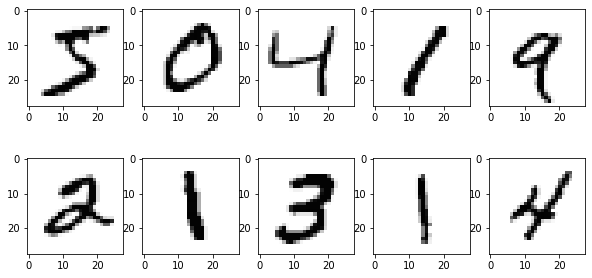

In [4]:
# 원본 데이터 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for i in range(2*5):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_tn0[i].reshape((28, 28)), 
               cmap='Greys')
plt.show()

In [5]:
# 피쳐 데이터 스케일 조정
X_tn_re = X_tn0.reshape(60000,28,28,1)
X_tn = X_tn_re/255
print(X_tn.shape)

X_te_re = X_te0.reshape(10000,28,28,1)
X_te = X_te_re/255
print(X_te.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [8]:
# 노이즈 피쳐 데이터 
import numpy as np
X_tn_noise = X_tn + np.random.uniform(-1,1,size=X_tn.shape)
X_te_noise = X_te + np.random.uniform(-1,1,size=X_te.shape)

In [9]:
# 노이즈 데이터 스케일링
X_tn_ns = np.clip(X_tn_noise, a_min=0, a_max=1)
X_te_ns = np.clip(X_te_noise, a_min=0, a_max=1)

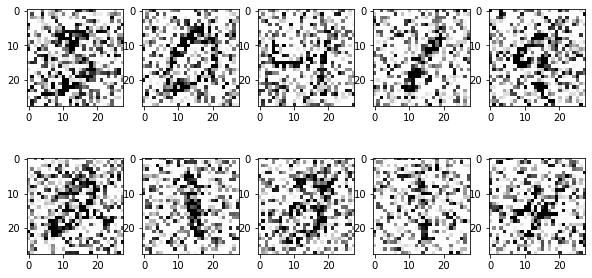

In [10]:
# 노이즈 데이터 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for i in range(2*5):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_tn_ns[i].reshape((28, 28)), 
               cmap='Greys')
plt.show()

In [11]:
# 오토인코더
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import UpSampling2D

model = Sequential()
# 인코딩
model.add(Conv2D(20, kernel_size=(5,5), 
                 input_shape=(28,28,1), 
                 padding='same', 
                 activation='relu'))
model.add(MaxPool2D(pool_size=2, 
                    padding='same'))
# 디코딩
model.add(Conv2D(10, kernel_size=(5,5), 
                 padding='same', 
                 activation='relu'))
model.add(UpSampling2D())
model.add(Conv2D(1, kernel_size=(5,5), 
                 padding='same', 
                 activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 10)        5010      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 28, 28, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 1)         251       
Total params: 5,781
Trainable params: 5,781
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 모형 컴파일
model.compile(loss='mean_squared_error', 
              optimizer='adam', 
              metrics=['mean_squared_error'])

In [13]:
# 학습
hist = model.fit(X_tn_ns, X_tn, 
                 epochs=1, 
                 batch_size=100)

600/600 [==============================] - 54s 89ms/step - loss: 0.0374 - mean_squared_error: 0.0374


In [14]:
# 예측값
X_pred = model.predict(X_tn_ns)

In [15]:
print(X_pred.shape)

(60000, 28, 28, 1)


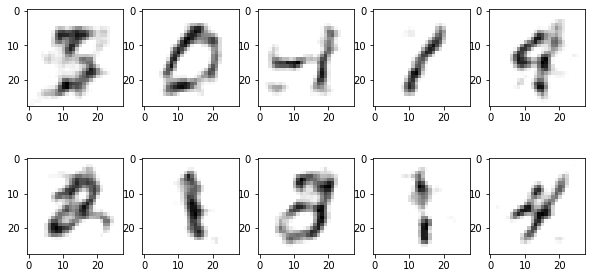

In [16]:
# 오토인코딩 데이터 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for i in range(2*5):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_pred[i].reshape((28, 28)), 
               cmap='Greys')
plt.show()

# 통합 코드

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


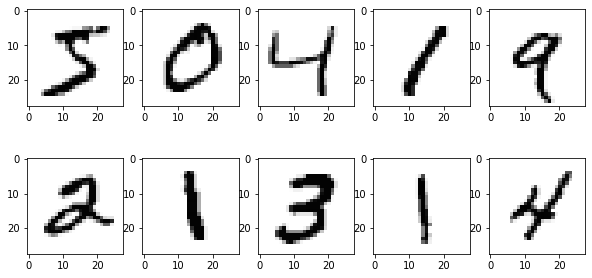

(60000, 28, 28, 1)
(10000, 28, 28, 1)


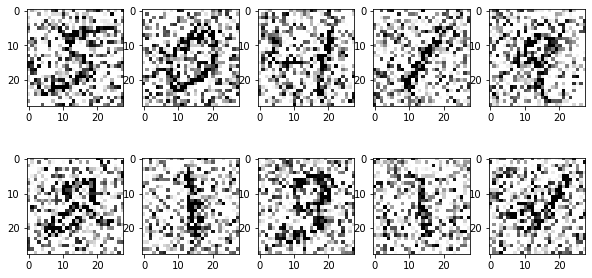

600/600 [==============================] - 55s 91ms/step - loss: 0.0371 - mean_squared_error: 0.0371


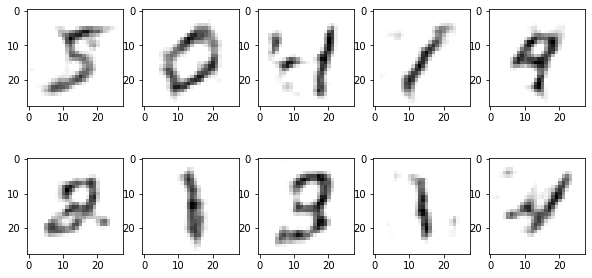

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import UpSampling2D

# 랜덤 시드 설정
np.random.seed(0)
tf.random.set_seed(0)

# 데이터 불러오기
(X_tn0,y_tn0),(X_te0,y_te0)=datasets.mnist.load_data()

# 원본 데이터 차원 확인
print(X_tn0.shape)
print(y_tn0.shape)
print(X_te0.shape)
print(y_te0.shape)

# 원본 데이터 시각화
plt.figure(figsize=(10, 5))
for i in range(2*5):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_tn0[i].reshape((28, 28)), 
               cmap='Greys')
plt.show()

# 피쳐 데이터 스케일 조정
X_tn_re = X_tn0.reshape(60000,28,28,1)
X_tn = X_tn_re/255
print(X_tn.shape)

X_te_re = X_te0.reshape(10000,28,28,1)
X_te = X_te_re/255
print(X_te.shape)

# 노이즈 피쳐 데이터 
X_tn_noise = X_tn + np.random.uniform(-1,1,size=X_tn.shape)
X_te_noise = X_te + np.random.uniform(-1,1,size=X_te.shape)

# 노이즈 데이터 스케일링
X_tn_ns = np.clip(X_tn_noise, a_min=0, a_max=1)
X_te_ns  = np.clip(X_te_noise, a_min=0, a_max=1)

# 노이즈 데이터 시각화
plt.figure(figsize=(10, 5))
for i in range(2*5):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_tn_ns[i].reshape((28, 28)), cmap='Greys')
plt.show()

# 오토인코더
model = Sequential()
# 인코딩
model.add(Conv2D(20, kernel_size=(5,5), 
                 input_shape=(28,28,1), 
                 padding='same', 
                 activation='relu'))
model.add(MaxPool2D(pool_size=2, 
                    padding='same'))
# 디코딩
model.add(Conv2D(10, kernel_size=(5,5), 
                 padding='same', 
                 activation='relu'))
model.add(UpSampling2D())
model.add(Conv2D(1, kernel_size=(5,5), 
                 padding='same', 
                 activation='relu'))

# 모형 컴파일
model.compile(loss='mean_squared_error', 
              optimizer='adam', 
              metrics=['mean_squared_error'])

# 학습
hist = model.fit(X_tn_ns, X_tn, 
                 epochs=1, 
                 batch_size=100)

# 예측값
X_pred = model.predict(X_tn_ns)

# 오토인코딩 데이터 시각화
plt.figure(figsize=(10, 5))
for i in range(2*5):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_pred[i].reshape((28, 28)), 
               cmap='Greys')
plt.show()